# EDA

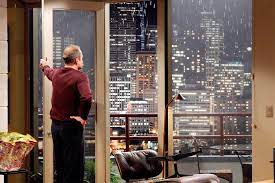

# Exploratory data analysis with python: house prices


## Exploratory data analysis steps

###  Work to be done for the end goal machine learning

##### Importing settings from 0_definitions.py file 

In [61]:
with open("0_definitions.py") as file:
    exec(file.read())


In [62]:
with open("1_query_SQL.py") as file:
    exec(file.read())

OSError: Cannot save file into a non-existent directory: 'data'

##### Query from SQL from 1_query_SQL.py

In [ ]:
df_eda = pd.read_csv('eda1.csv', delimiter = ","  )
df_eda = df_eda.drop(df_eda.columns[0], axis=1)
df_eda.head(5) # look at first five lines of dataframe

In [ ]:
# check which columns are included in our dataframe
df_eda.columns
 

In [ ]:
df_eda.describe

In [ ]:
# for controlling of number of rows and collumns
df_eda.shape

##### Saving data inbetween

In [ ]:
df_eda.to_csv("eda2.csv")
df_eda.head() 

##### Openning data again

In [ ]:
df_eda = pd.read_csv('eda2.csv',)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)
df_eda.head() 

In [ ]:
# checking for duplications
df_eda = df_eda.duplicated().value_counts()
duplicates = df_eda[df_eda.duplicated()]
print(duplicates)
print("Number of duplicate rows:", duplicates.shape[0])
num_duplicates = duplicates.shape[0]
if num_duplicates != 0:
    df_eda = df_eda.drop_duplicates()
# reset index inplace
    df_eda.reset_index(inplace=True, drop=True)
    df_eda.head(5)
    print("There are still duplicates:")
    stop 

else:
     df_eda = pd.read_csv('eda2.csv',)
     df_eda = df_eda.drop(df_eda.columns[0], axis=1)
     print("no duplicates")
     
 
df_eda.head() 
 

### Dealing with missings

In [ ]:
# df_eda = df_eda.apply(lambda x: x.str.strip() if x.dtype == "object" else x).replace('', pd.NA)
df_eda.isnull().sum()

In [ ]:
# missing_values = df_eda.isna()
df_eda.head()

#### Preliminary working assumption: missing completely at random => can be delated

In [ ]:
# delating raws with at least one missing in a coulumn
df_eda = df_eda.dropna()
#df_eda["yr_renovated"] = df_eda["yr_renovated"].interpolate().round(1)
df_eda.shape

### Adjusting data types


#### Make a list of categorical and continious variables

In [ ]:
df_eda.dtypes

In [54]:
# numerical
numerical_features = [
	'price',
	'sqft_living',
	'sqft_lot',
	'sqft_above',
	'sqft_basement',
	'yr_built',
	'yr_renovated',
	'lat',
	'long',
	'sqft_living15',
	'sqft_lot15'    
]

categorical_features = [
	'bedrooms' , 
    'zipcode',
	'bathrooms' , 
	'floors' , 
	'waterfront' , 
	'view' , 
	'condition' ,     
	'grade'  
]

#### Renaming columns and dropping columns

In [ ]:
df_eda.head()

In [ ]:
df_eda = df_eda.rename(columns={'date': 'date_sold'})
df_eda.head()

#### set numerical features to float and categorical to int type


In [ ]:
# Convert numerical features to float
df_eda = df_eda.astype({feature: float for feature in numerical_features})

# Convert categorical features to int
df_eda = df_eda.astype({feature: 'int' for feature in categorical_features if feature in df_eda.columns})
df_eda.info()

#### End of the file and saving


In [ ]:
# Inbeetween saving
df_eda.to_csv("eda3.csv")
df_eda.head()
